## Anomaly detection 


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.io import loadmat

###First data is Multi-dimensional point datasets

#### Dataset information

The original lymphography dataset from UCI machine learning repository is a classification dataset. It is a multi-class dataset having four classes, but two of them are quite small (2 and 4 data records). Therefore, those two small classes are merged and considered as outliers compared to other two large classes (81 and 61 data records).

### Upload the data

In [ ]:
data1 = loadmat('/content/drive/MyDrive/Colab Notebooks/Data Files/lympho.mat')

In [ ]:
#data1

In [ ]:
y1 = data1['y']
x1 = data1['X']
print(x1.shape)
print(y1.shape)

(148, 18)
(148, 1)


In [ ]:
# Create the dataframe
df = pd.DataFrame(x1, columns=['x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18'])

In [ ]:
dfy = pd.DataFrame(y1, columns=['y'])
df_all = pd.concat([df,dfy],axis=1)

In [ ]:
df_all.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,8.0,1.0,2.0,2.0,4.0,1.0
3,3.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,4.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0
4,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,7.0,1.0


In [ ]:
df_all.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351,0.040541
std,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023,0.197893
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000,0.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000,1.000000


In [ ]:
df_all["y"].unique()

array([1., 0.])

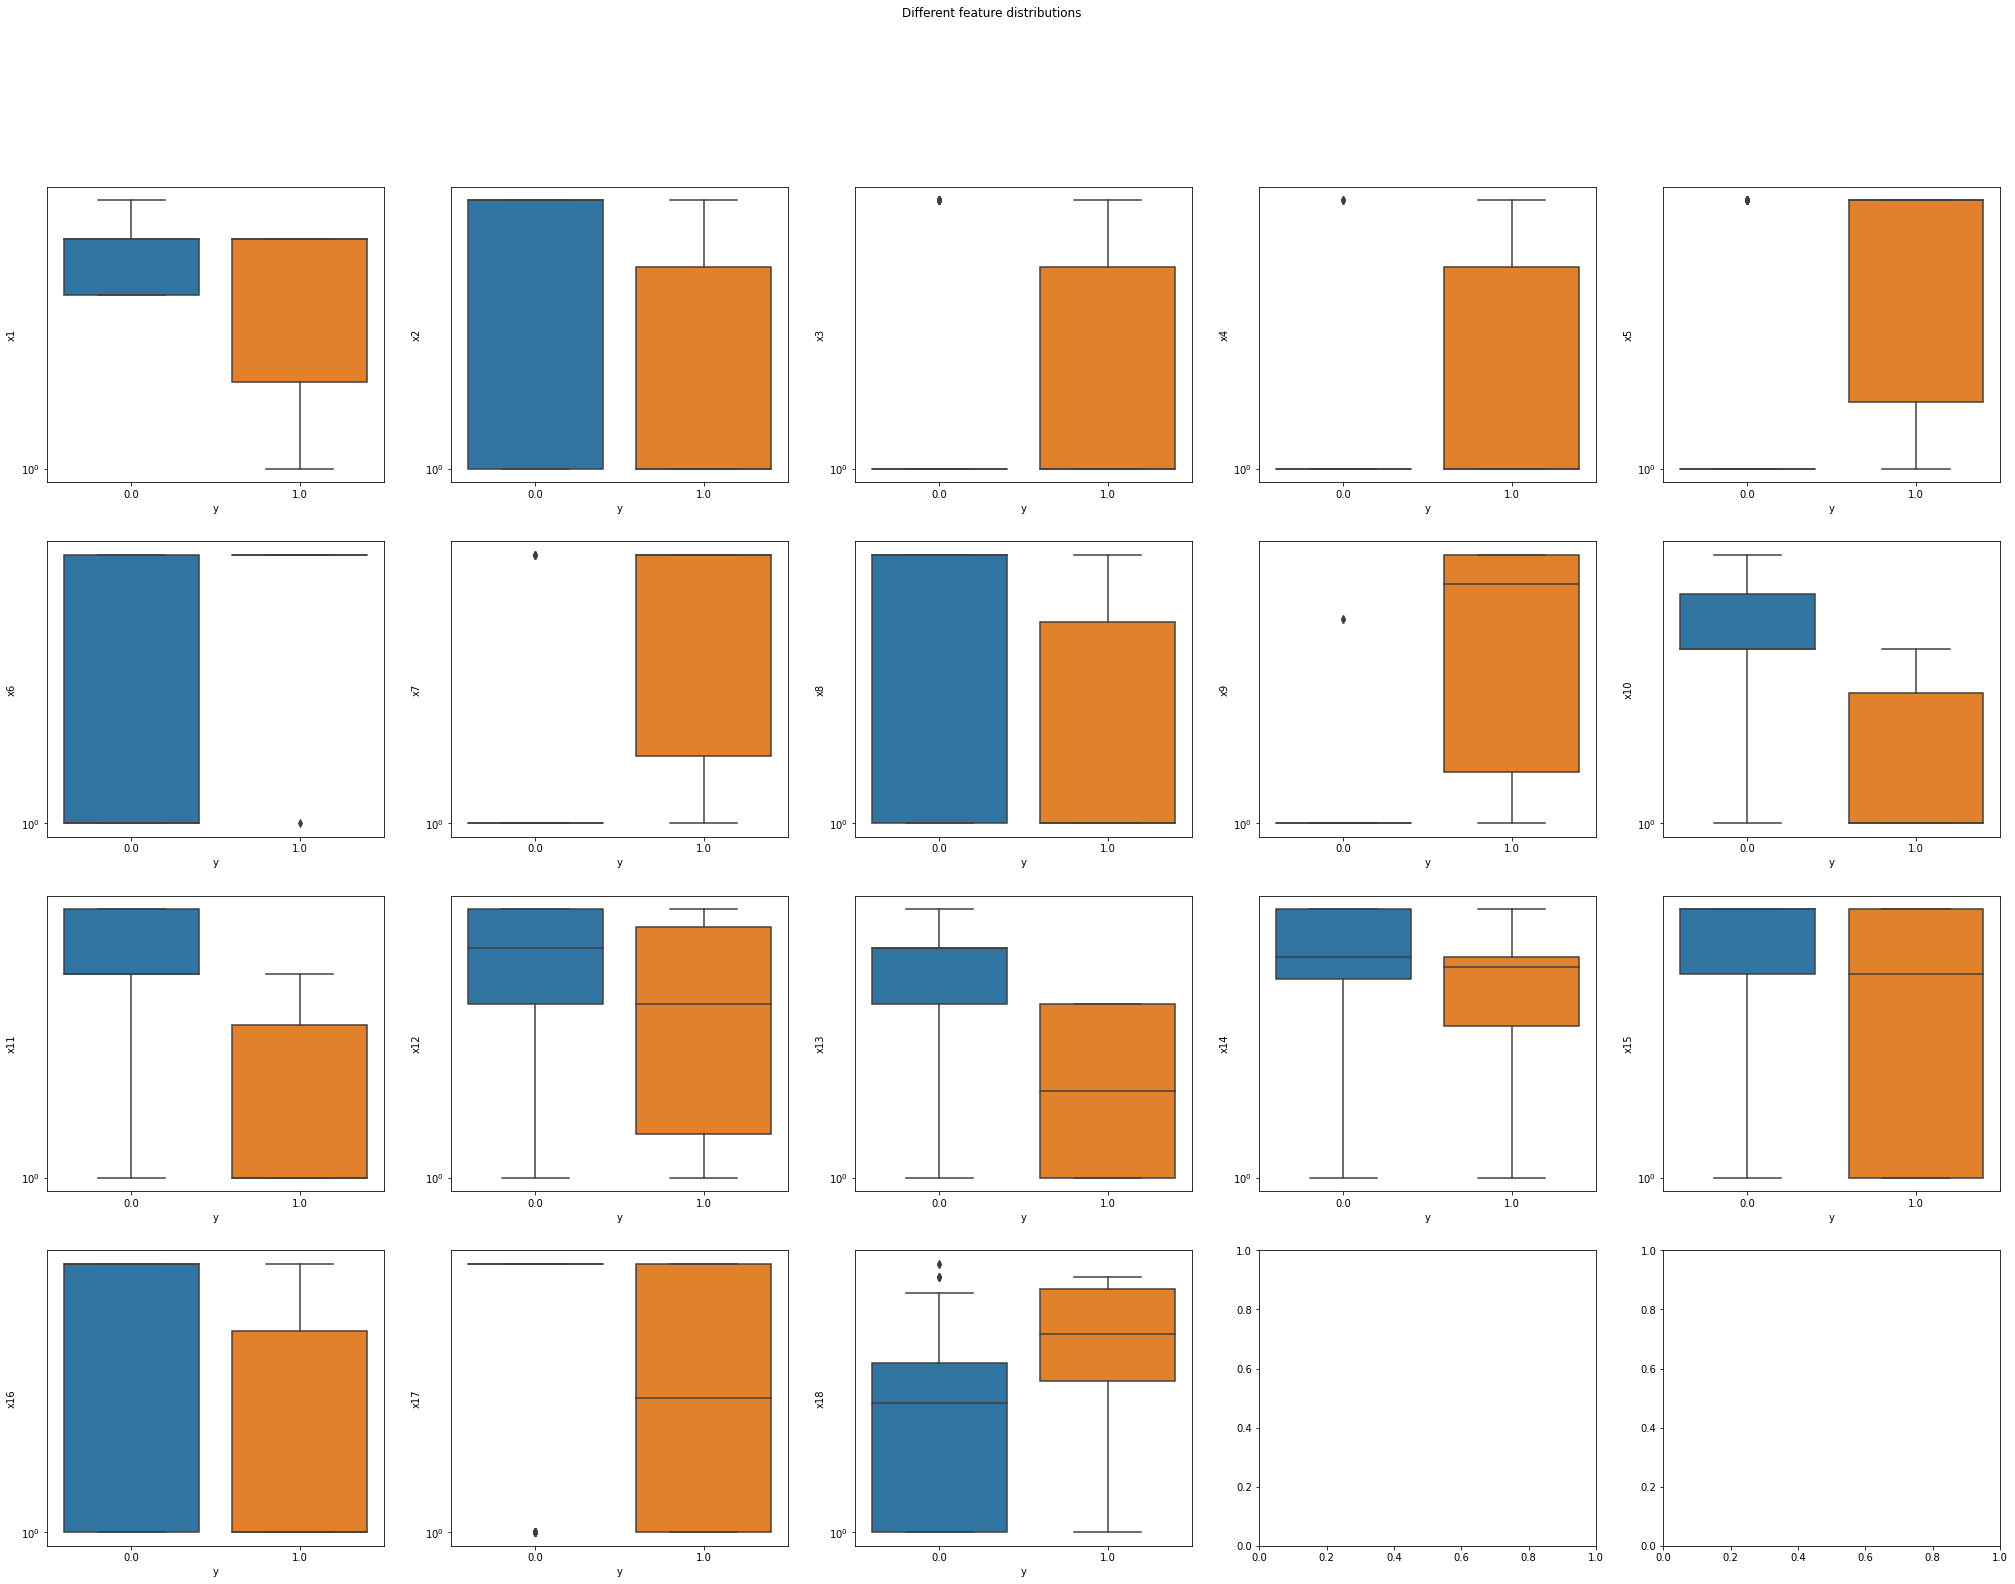

In [ ]:
# show outliers
fig, axes = plt.subplots(4, 5, figsize=(35, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(20,)

for i,column in enumerate(df_all.columns[:-1]):
    axes[i].set_yscale('symlog')
    sns.boxplot(ax = axes[i],x="y", y=column,data=df_all)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,dfy, test_size=0.33, random_state=1, shuffle=True)

In [ ]:
X_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
119,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,5.0,3.0,2.0,2.0,3.0
144,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,6.0
105,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0
124,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,4.0,5.0,3.0,2.0,2.0,5.0
84,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0


### What is a Gaussian mixture model What is it used for?
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters

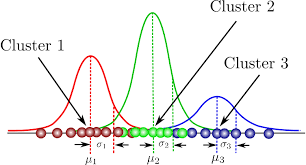

### Let’s start coding

In [ ]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

In [ ]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

In [ ]:
X_test.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2.795918,1.571429,1.163265,1.040816,1.204082,1.469388,1.061224,1.653061,1.081633,2.367347,2.367347,2.979592,2.816327,5.244898,2.244898,1.693878,1.795918,2.346939
std,0.815976,0.500000,0.373438,0.199915,0.407206,0.504234,0.242226,0.480929,0.343798,0.782461,0.528121,0.853664,0.754803,2.241006,0.750850,0.465657,0.407206,1.843355
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,7.000000


In [ ]:
len(X_test)

49

In [ ]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma) # contain mean & probability for each sample

x1     2.717172
x2     1.545455
x3     1.181818
x4     1.050505
x5     1.262626
x6     1.525253
x7     1.070707
x8     1.727273
x9     1.050505
x10    2.525253
x11    2.414141
x12    2.959596
x13    2.797980
x14    5.202020
x15    2.373737
x16    1.646465
x17    1.787879
x18    2.727273
dtype: float64 x1     0.667483
x2     0.247934
x3     0.148760
x4     0.047954
x5     0.193654
x6     0.249362
x7     0.065708
x8     0.198347
x9     0.088358
x10    0.734211
x11    0.343638
x12    0.766044
x13    0.585450
x14    4.565248
x15    0.617896
x16    0.228548
x17    0.167126
x18    3.693297
dtype: float64


100    0.001205
121    0.001205
54     0.001205
104    0.001205
99     0.001205
75     0.001205
90     0.001205
53     0.001205
44     0.001205
59     0.001205
5      0.001205
16     0.001205
92     0.001205
14     0.001205
58     0.001205
33     0.001205
73     0.001205
29     0.001205
66     0.001205
35     0.001205
118    0.001205
85     0.001205
31     0.001205
141    0.001205
110    0.001205
19     0.001205
51     0.001205
48     0.001205
89     0.001205
142    0.001205
126    0.001205
97     0.001205
42     0.001205
135    0.001205
28     0.001205
40     0.001205
117    0.001205
116    0.001205
17     0.001205
112    0.001205
78     0.001205
69     0.001205
74     0.001205
18     0.001205
4      0.001205
45     0.001205
56     0.001205
39     0.001205
36     0.001205
dtype: float64

In [ ]:
# uning sklearn 
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0)
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
c=gm.predict_proba(X_test)

In [ ]:
len(X_test)

49

In [ ]:
len(c)

49

In [ ]:
c # contain probability for each sample

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [3.67086122e-012, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.33526987e-002, 9.86647301e-001, 0.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 3.26634147e-015,
        0.00000000e+000],
       [8.67700659e-013, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [9.97977017e-001, 2.02298272e-003, 0.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
      

In [ ]:
y_pre = gm.predict(X_test)
y_pre

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0])

## what is AUC metric 
Compute Area Under the Curve (AUC) using the trapezoidal rule.

This is a general function, given points on a curve. For computing the area under the ROC-curve

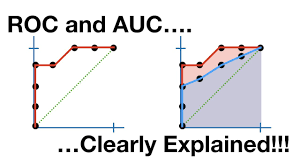

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre)
metrics.auc(fpr, tpr)

0.9787234042553191

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42,max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))

LogisticRegressionModel Train Score is :  0.98989898989899


In [ ]:
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Test Score is :  0.9795918367346939


In [ ]:
y_pred = LogisticRegressionModel.predict(X_test)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.75

Score of GGM is 0.97 and Logistic Regression Model is 0.75 so the GMM is better that LR with Anomaly Detection

### The credit card fraud detection dataset 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

### Reading data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv", delim_whitespace=False)

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Cleaning data

In [ ]:
print("Total number of cells with missing data: \n\n" ,df.isnull().sum().sum())

Total number of cells with missing data: 

 0


### First look at the data

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As we can see, mean value for transactions amount is approx. 88 dollars

### Visualizations

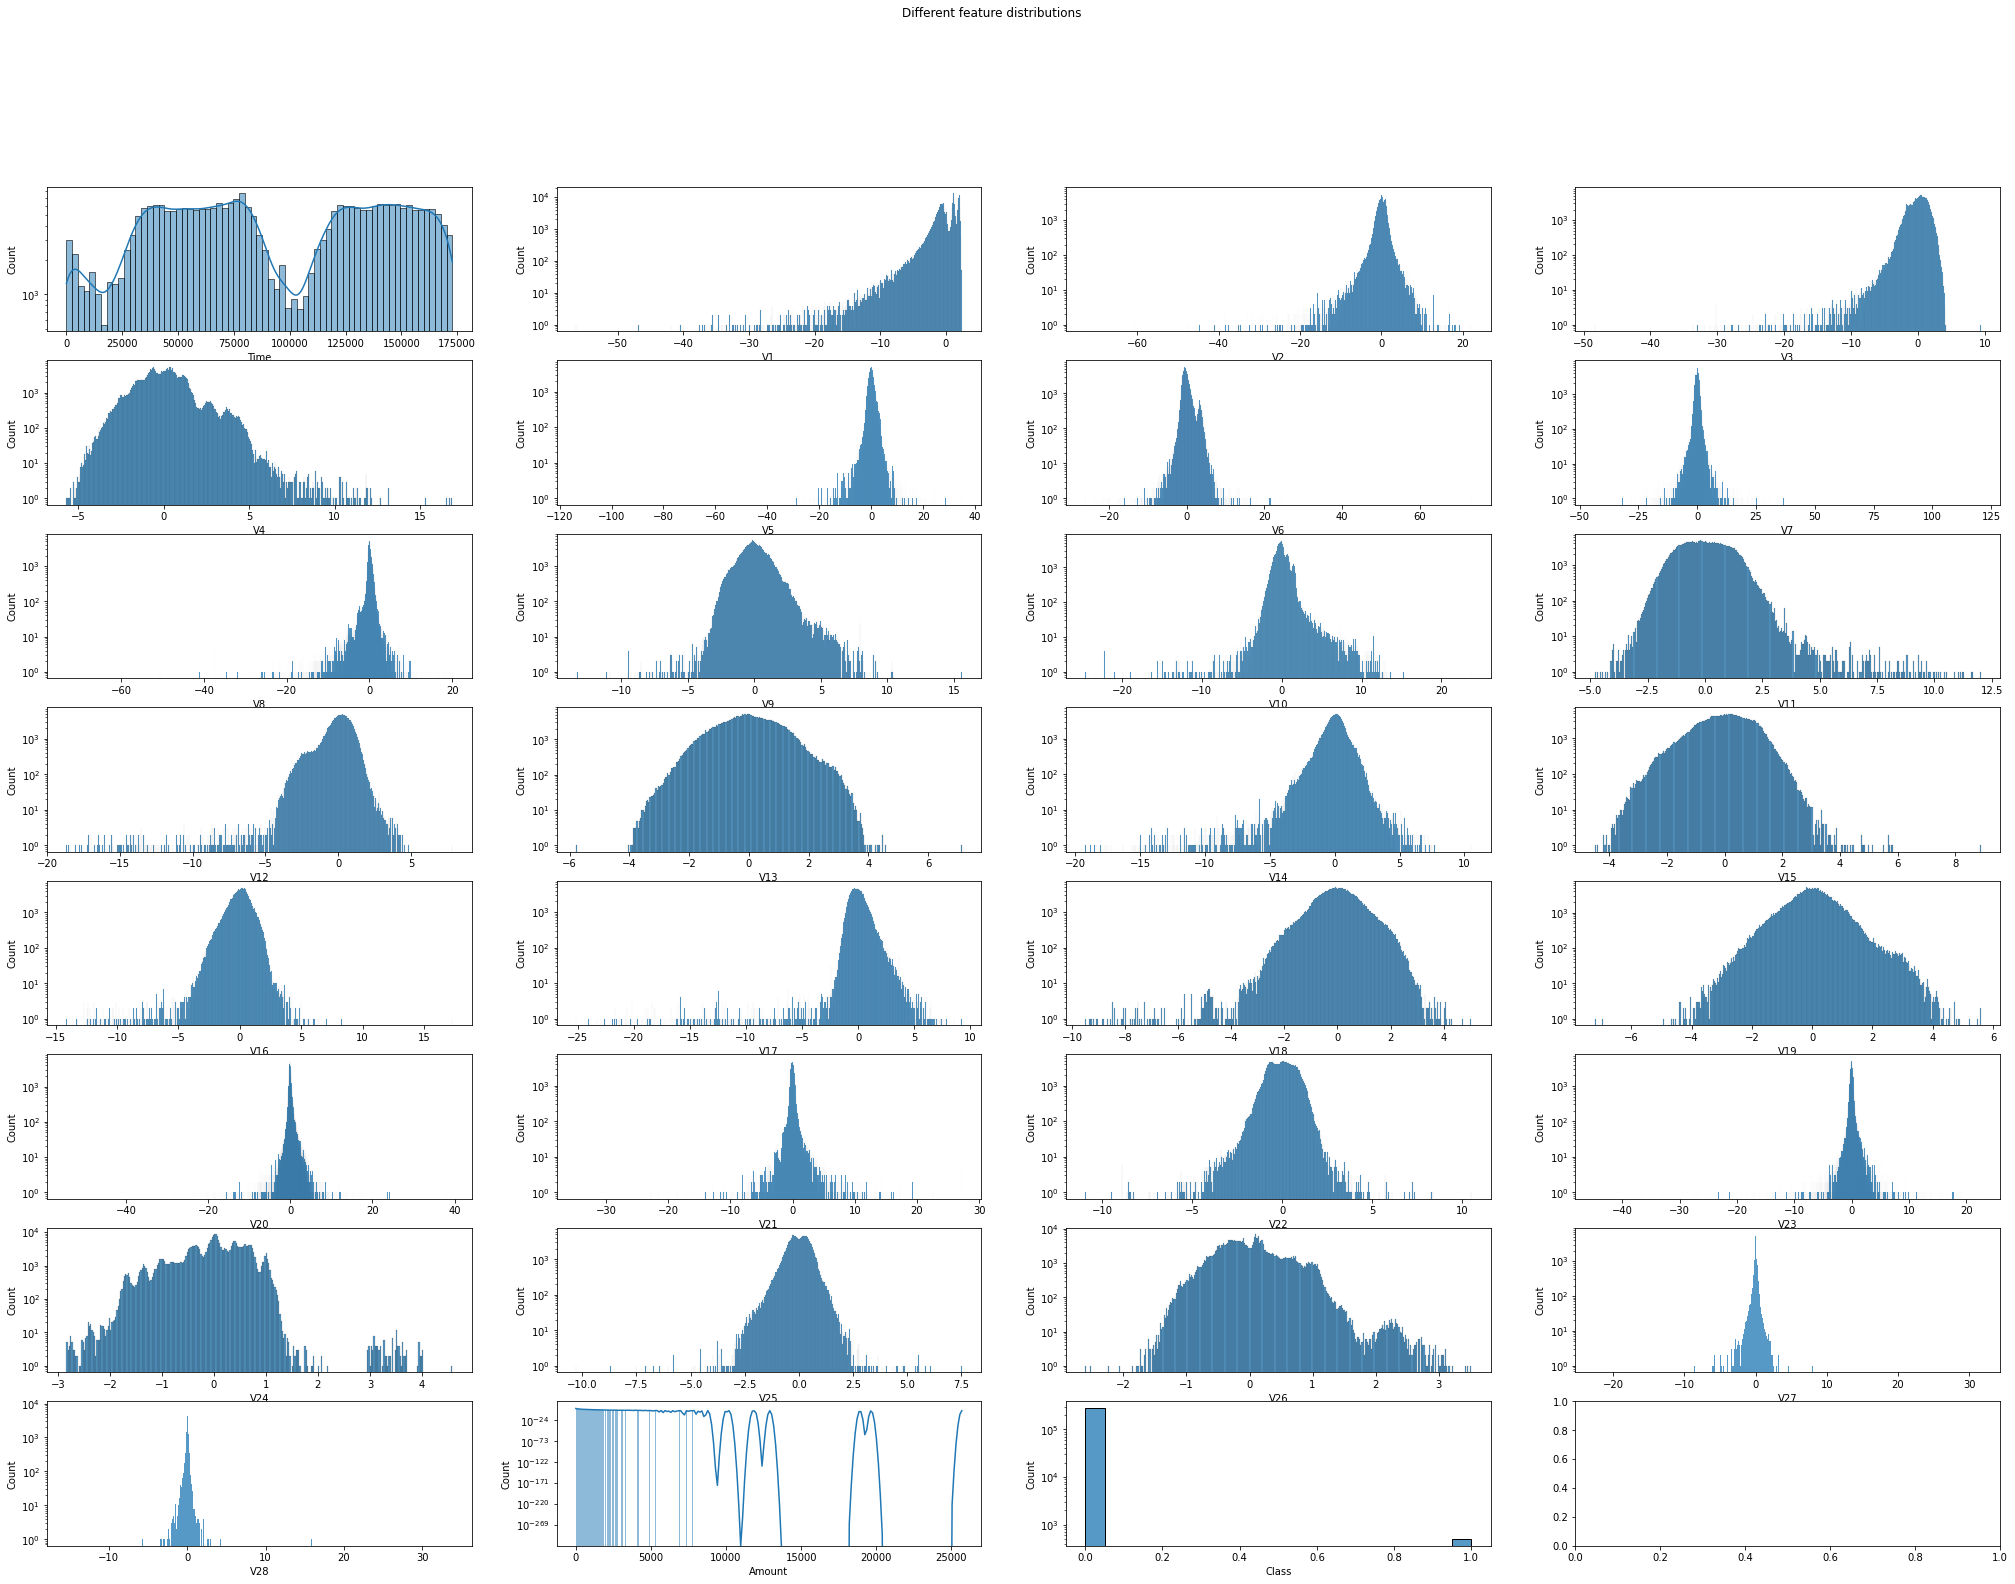

In [ ]:
#Distributions

fig, axes = plt.subplots(8, 4, figsize=(35, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(32,)

for i,column in enumerate(df.columns):
    kde_status = False
    axes[i].set_yscale('log')
    
    if column == "Time" or column == "Amount":
        kde_status = True
        
    sns.histplot(ax = axes[i],data = df, x= column,kde=kde_status)

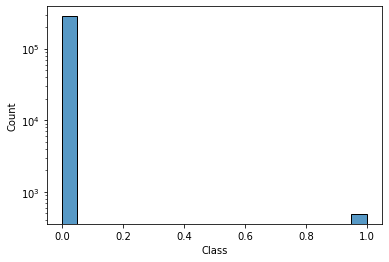

In [ ]:
# Let's have a closer look to Class distribution

plot = sns.histplot(data = df , x = "Class")
plot.set(yscale="log")
print()

As we can see, our data is heavily imbalanced with respect to target variable - Class. In further data preparation step we have to consider it and perform several techniques to resolve this issue.

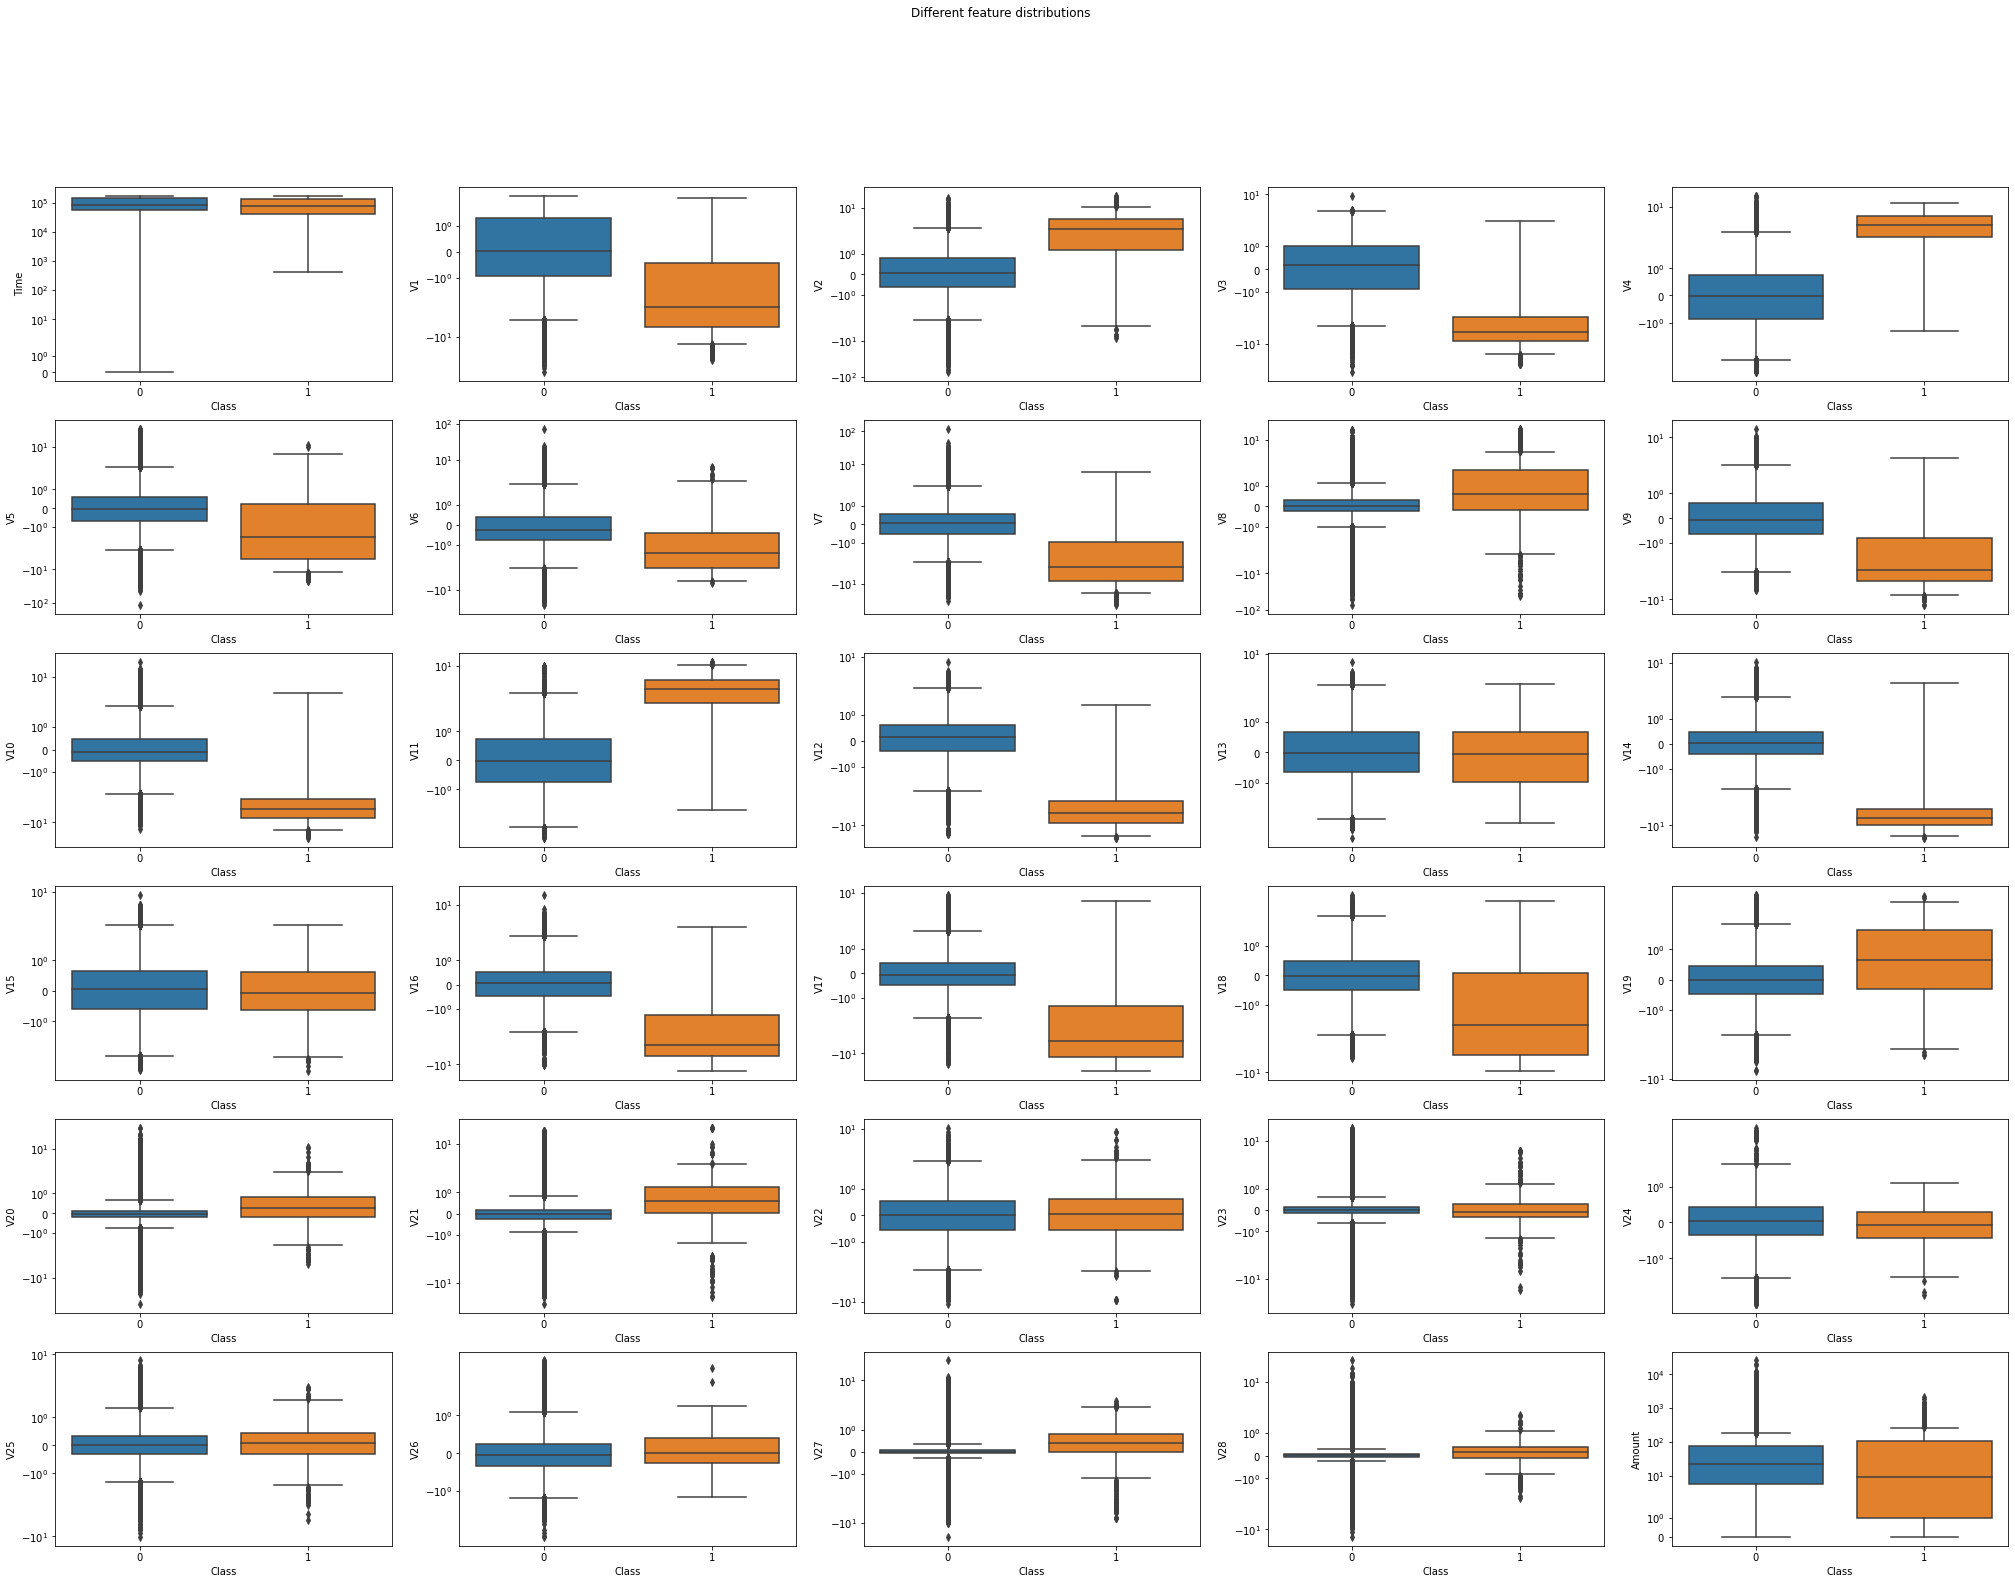

In [ ]:
# Boxplots

fig, axes = plt.subplots(6, 5, figsize=(35, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(30,)

for i,column in enumerate(df.columns[:-1]):
    axes[i].set_yscale('symlog')
    sns.boxplot(ax = axes[i],x="Class", y=column,data=df)

### Preparing data for models

In [ ]:
# Scaling Time and Amount


transformer = RobustScaler()

df['Amount'] = transformer.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']   = transformer.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df["Class"].unique()

array([0, 1])

In [ ]:
# Dealing with imbalanced data

X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])

In [ ]:
from sklearn.utils import shuffle
X , y = shuffle(X,y,random_state = 0)

In [ ]:
# Oversampling: SMOTE
from imblearn.over_sampling import SMOTE

over_X , over_y = SMOTE().fit_resample(X, y)
over_X , over_y = shuffle(over_X,over_y,random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Using Oversampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(over_X,over_y, test_size=0.33, random_state=1, shuffle=True)

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
c=gm.predict_proba(X_test)
c

array([[0.0000000e+000, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       ...,
       [2.7125021e-056, 1.0000000e+000],
       [6.1508333e-222, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000]])

In [ ]:
y_pre = gm.predict(X_test)
y_pre

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre)
metrics.auc(fpr, tpr)

0.33809053423878477

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42,max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))

LogisticRegressionModel Train Score is :  0.9473098466594222


In [ ]:
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Test Score is :  0.948424710095498


In [ ]:
y_pred = LogisticRegressionModel.predict(X_test)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.9484117547251205